In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import tsa
from random import randrange

In [36]:
df=pd.read_csv(r'C:\Users\JDD\Desktop\深圳裕展出库明细-0730.csv',encoding='gbk')
df['datetime'] = pd.to_datetime(df['实际出库日期'], format='%Y/%m/%d')
df

,实际出库日期,ZKH产品编码,存货编码,批次号,存货名称,实际出库数量,datetime
0,2018/1/2,WE8531,1.06E+17,YFS,DIN912 合金钢内六角圆柱头螺钉 M3*12,0.100,2018-01-02
1,2018/1/2,WE9513,1.06E+17,ARD,DIN912 合金钢内六角圆柱头螺钉 M5*25,0.100,2018-01-02
2,2018/1/2,WE7769,1.05E+17,YFS,DIN7991 合金钢 内六角沉头螺钉 M3*10,0.100,2018-01-02
3,2018/1/2,WJ1379,1.06E+17,YFS,DIN912 合金钢内六角圆柱头螺钉 M8*70,0.032,2018-01-02
4,2018/1/2,WE8531,1.06E+17,YFS,DIN912 合金钢内六角圆柱头螺钉 M3*12,0.250,2018-01-02
...,...,...,...,...,...,...,...
29995,2020/7/14,WE9671,1.05E+17,YFS,DIN7991 合金钢 内六角沉头螺钉 M6*12,0.200,2020-07-14
29996,2020/7/17,WJ1543,1.06E+17,YFS,DIN912 合金钢内六角圆柱头螺钉 M3*55,0.054,2020-07-17
29997,2020/7/17,WE8145,2.11E+17,THE,GB70.1 不锈钢304内六角圆柱头螺钉 M3*10,0.200,2020-07-17
29998,2020/7/17,WF0999,1.06E+17,YFS,DIN912 合金钢内六角圆柱头螺钉 M4*30,0.050,2020-07-17


In [88]:
df['ZKH产品编码'].value_counts()

WE8090    527
WE7653    505
WE9052    503
WE8682    473
WE8509    472
         ... 
WH3999      1
WE6643      1
WJ1715      1
WE6103      1
WF1260      1
Name: ZKH产品编码, Length: 622, dtype: int64

In [89]:
df1=df.loc[df['ZKH产品编码']=='WE7653'][['datetime','实际出库数量']].set_index('datetime',drop=True)
df1

,实际出库数量
datetime,
2018-01-02,0.050
2018-01-02,0.120
2018-01-02,0.350
2018-01-02,0.008
2018-01-03,0.096
...,...
2020-04-10,0.300
2020-04-10,0.300
2020-04-10,1.050


In [90]:
train=df1[:399]
test=df1[400:]

D:\anaconda\envs\tfenv\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


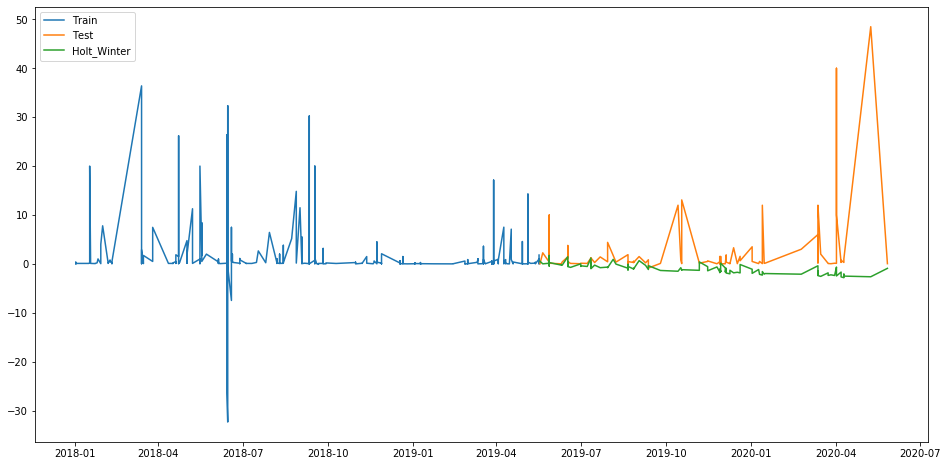

In [110]:
from statsmodels.tsa.api import ExponentialSmoothing
  
y_hat_avg = df1[400:].copy()
fit1 = ExponentialSmoothing(np.asarray(df1[:399]['实际出库数量']), seasonal_periods=10, trend='additive', seasonal='additive').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df1[400:]))
plt.figure(figsize=(16, 8))
plt.plot(df1[:399]['实际出库数量'], label='Train')
plt.plot(df1[400:]['实际出库数量'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [97]:
import statsmodels.api as sm
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['实际出库数量'], order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2018-01-02", end="2019-05-17")
plt.figure(figsize=(16, 8))
plt.plot(train['实际出库数量'], label='Train')
plt.plot(test['实际出库数量'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

D:\anaconda\envs\tfenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anaconda\envs\tfenv\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: cannot reindex from a duplicate axis

In [93]:
train

,实际出库数量
datetime,
2018-01-02,0.050
2018-01-02,0.120
2018-01-02,0.350
2018-01-02,0.008
2018-01-03,0.096
...,...
2019-05-17,0.100
2019-05-17,0.016
2019-05-17,0.100


In [94]:
test

,实际出库数量
datetime,
2019-05-18,0.020
2019-05-21,2.268
2019-05-28,0.360
2019-05-28,0.842
2019-05-28,10.000
...,...
2020-04-10,0.300
2020-04-10,0.300
2020-04-10,1.050
